# EXPLORATORY DATA ANALYSIS ON A DATASET


# 1. Data Cleaning and Preparation  
- Load the dataset into a data frame or equivalent data structure.  
- Handle missing values appropriately (e.g., imputation, deletion).  
- Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).  
- Detect and treat outliers if necessary.  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
file_path = r"C:\Users\91705\OneDrive\Desktop\ExcelR\Assignments\.csv files\Cardiotocographic.csv"
df = pd.read_csv(file_path)
display(df.head(10))
print("\nShape:", df.shape)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000,0.000,0.000,0.000,0.000,0.000,0.000,73.000,0.500,43.000,2.400,64.000,1.000,2.000
1,132.000,0.006,0.000,0.006,0.003,0.000,0.000,17.000,2.100,0.000,10.400,130.000,0.000,1.000
2,133.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.100,0.000,13.400,130.000,0.000,1.000
3,134.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.400,0.000,23.000,117.000,1.000,1.000
4,131.948,0.007,0.000,0.008,0.000,0.000,0.000,16.000,2.400,0.000,19.900,117.000,1.000,1.000
5,134.000,0.001,0.000,0.010,0.009,0.000,0.002,26.000,5.900,0.000,0.000,150.000,0.000,3.000
6,134.000,0.001,0.000,0.013,0.008,0.000,0.003,29.000,6.300,0.000,0.000,150.000,0.000,-1.026
7,122.000,0.000,0.000,0.000,0.000,0.000,0.000,83.000,0.500,6.000,15.600,69.920,1.000,3.000
8,122.000,0.039,0.000,0.002,0.000,0.000,0.000,84.000,0.500,5.000,13.600,68.000,1.000,3.000
9,122.000,0.000,0.000,0.003,0.000,0.000,0.000,86.000,0.300,6.000,10.600,68.000,1.000,3.000



Shape: (2126, 14)


In [ ]:
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB

Missing values per column:
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP

In [ ]:
for col in df.columns:
    if df[col].dtype == object:
        try:
            df[col] = pd.to_numeric(df[col].str.strip())
        except Exception:
            pass

df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [ ]:
print("Missing values after treatment:\n", df.isnull().sum())

Missing values after treatment:
 LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [ ]:
outlier_summary = []
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    out_count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    outlier_summary.append((col, out_count, lower, upper))

outlier_df = pd.DataFrame(outlier_summary, columns=['column','outlier_count','lower_bound','upper_bound'])
outlier_df.sort_values('outlier_count', ascending=False).reset_index(drop=True)

,column,outlier_count,lower_bound,upper_bound
0,NSP,559,1.000,1.000
1,FM,347,-0.004,0.006
2,ALTV,318,-16.500,27.500
3,DP,284,0.000,0.000
4,DL,125,-0.005,0.008
5,DS,120,0.000,0.000
6,MLTV,81,-4.700,20.100
7,MSTV,80,-0.800,3.200
8,AC,43,-0.008,0.014
9,UC,13,-0.005,0.014


In [ ]:
z_scores = np.abs(stats.zscore(df[numeric_cols]))
df = df[(z_scores < 3).all(axis=1)]

In [ ]:
print("Shape after outlier removal:", df.shape)

Shape after outlier removal: (1869, 14)


# 2. Statistical Summary  
- Provide a statistical summary for each variable in the dataset.  
- Include measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).  
- Highlight any interesting findings.  

In [ ]:
summary_df = df.describe().T
summary_df["median"] = df.median()
summary_df["IQR"] = df.quantile(0.75) - df.quantile(0.25)
summary_df

,count,mean,std,min,25%,50%,75%,max,median,IQR
LB,1869.000,133.303,9.900,106.000,126.000,133.000,141.000,160.000,133.000,15.000
AC,1869.000,0.003,0.004,-0.000,0.000,0.002,0.006,0.016,0.002,0.006
FM,1869.000,0.004,0.014,-0.005,0.000,0.000,0.002,0.189,0.000,0.002
UC,1869.000,0.004,0.003,-0.000,0.002,0.005,0.007,0.014,0.005,0.005
DL,1869.000,0.002,0.003,-0.000,0.000,0.000,0.003,0.012,0.000,0.003
DS,1869.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000
DP,1869.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.003,0.000,0.000
ASTV,1869.000,46.871,16.835,11.800,32.000,48.000,61.000,87.000,48.000,29.000
MSTV,1869.000,1.283,0.778,0.200,0.700,1.200,1.700,4.800,1.200,1.000
ALTV,1869.000,9.194,16.575,-1.044,0.000,0.000,11.000,73.000,0.000,11.000


# 3. Data Visualization  
- Create histograms or boxplots for distributions of numerical variables.  
- Use bar charts or pie charts for categorical variables.  
- Generate scatter plots or correlation heatmaps to explore relationships.  
- Use pair plots or violin plots for deeper insights.  


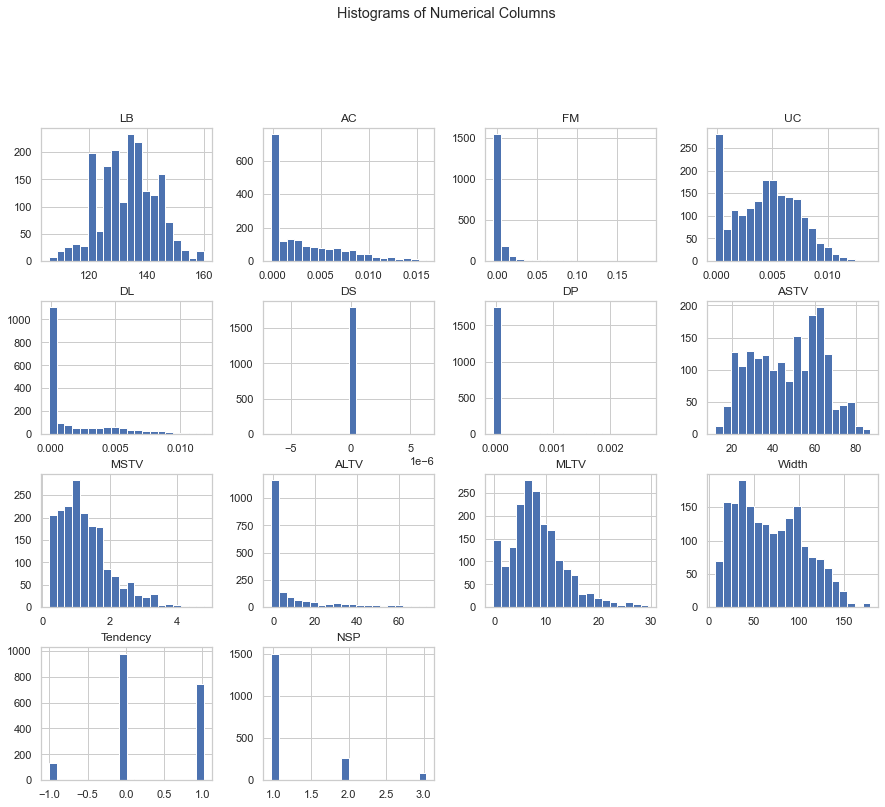

In [ ]:
df.hist(bins=20, figsize=(15, 12))
plt.suptitle("Histograms of Numerical Columns", y=1.02)
plt.show()

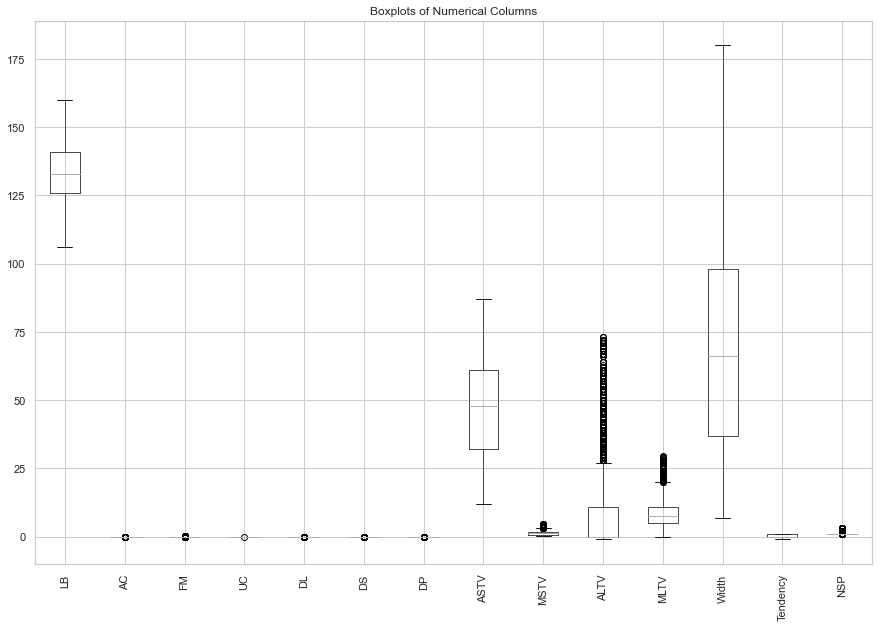

In [ ]:
plt.figure(figsize=(15, 10))
df.boxplot(rot=90)
plt.title("Boxplots of Numerical Columns")
plt.show()

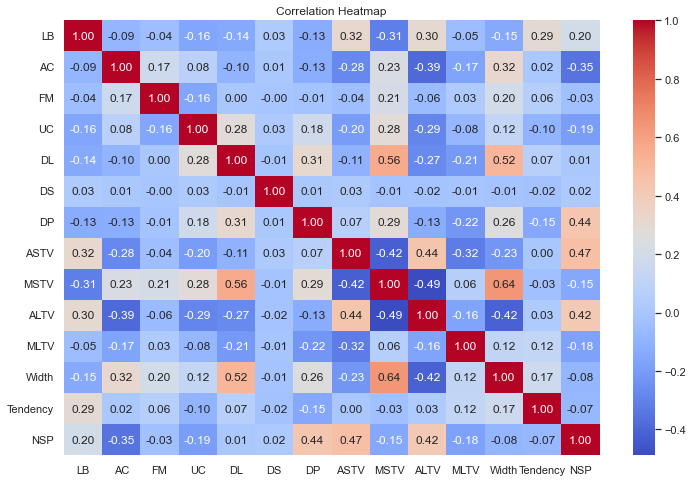

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

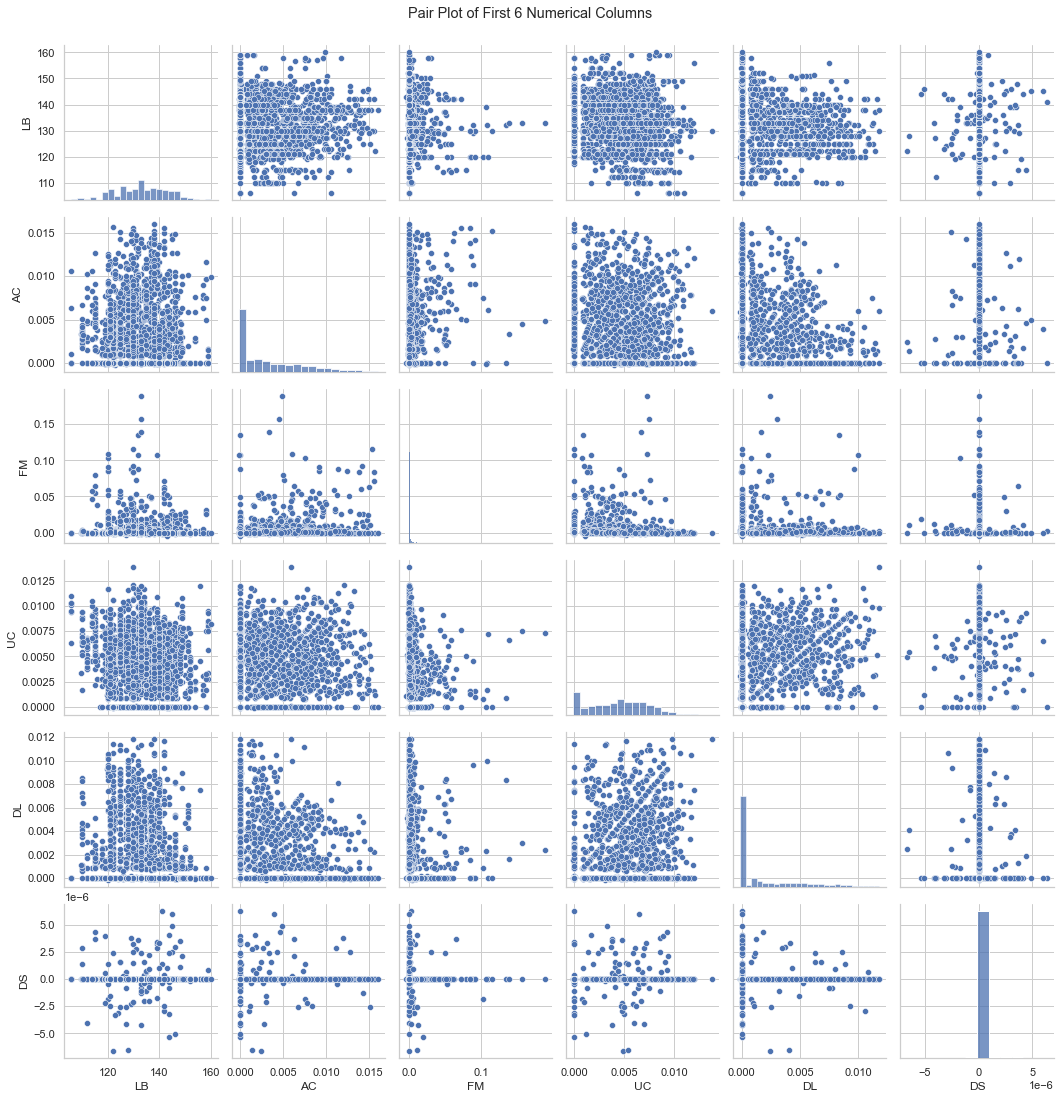

In [ ]:
sns.pairplot(df[numeric_cols[:6]])
plt.suptitle("Pair Plot of First 6 Numerical Columns", y=1.02)
plt.show()

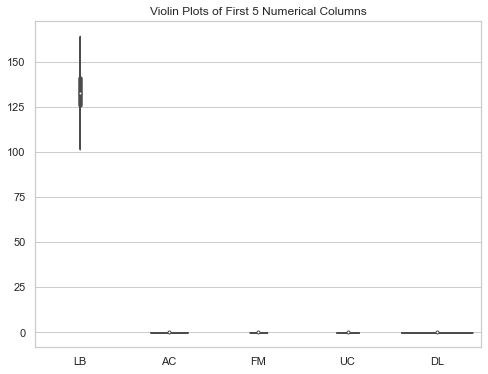

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df[numeric_cols[:5]])
plt.title("Violin Plots of First 5 Numerical Columns")
plt.show()

# 4. Pattern Recognition and Insights  
- Identify correlations between variables and discuss implications.  
- Look for trends or patterns in the dataset.  


In [ ]:
correlations = df.corr()
corr_pairs = (
    correlations.unstack()
    .reset_index()
    .rename(columns={"level_0": "Var1", "level_1": "Var2", 0: "corr"})
)
corr_pairs["abs_corr"] = corr_pairs["corr"].abs()
corr_pairs = corr_pairs[corr_pairs["Var1"] < corr_pairs["Var2"]]

In [ ]:
print("Top 8 strongest correlations:")
display(corr_pairs.sort_values("abs_corr", ascending=False).head(8))

Top 8 strongest correlations:


,Var1,Var2,corr,abs_corr
123,MSTV,Width,0.643,0.643
64,DL,MSTV,0.564,0.564
67,DL,Width,0.517,0.517
134,ALTV,MSTV,-0.489,0.489
111,ASTV,NSP,0.470,0.470
133,ALTV,ASTV,0.437,0.437
97,DP,NSP,0.435,0.435
106,ASTV,MSTV,-0.421,0.421



- Summarize key insights and patterns discovered.  
- Discuss how findings could impact decision-making or further analyses.  

In [ ]:
print("=== EDA Summary ===\n")
print("1) Dataset shape:", df.shape)
print("2) Numeric variables examined:", numeric_cols)
print("\n3) Missing values: filled numeric missing values with median.")
print("4) Outliers: detected using IQR. Optionally winsorized (clipped) and saved to cleaned CSV.")
print("\n5) Statistical highlights (sample):")
display(summary_df.sort_values('std', ascending=False).head(8))

print("\n6) Strongest correlations (top):")
display(corr_pairs.sort_values('abs_corr', ascending=False).head(8))

print("\nRecommendations:")
print("- Investigate variables with strong correlations for potential redundancy.")
print("- If temporal/monitoring data becomes available, analyze trends over time per patient.")
print("- Consider domain-specific thresholds for critical variables (e.g., decelerations) and consult clinical experts for interpretation.")

=== EDA Summary ===

1) Dataset shape: (1869, 14)
2) Numeric variables examined: Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

3) Missing values: filled numeric missing values with median.
4) Outliers: detected using IQR. Optionally winsorized (clipped) and saved to cleaned CSV.

5) Statistical highlights (sample):


,count,mean,std,min,25%,50%,75%,max,median,IQR
Width,1869.000,68.896,37.614,7.000,37.000,66.000,98.000,180.000,66.000,61.000
ASTV,1869.000,46.871,16.835,11.800,32.000,48.000,61.000,87.000,48.000,29.000
ALTV,1869.000,9.194,16.575,-1.044,0.000,0.000,11.000,73.000,0.000,11.000
LB,1869.000,133.303,9.900,106.000,126.000,133.000,141.000,160.000,133.000,15.000
MLTV,1869.000,8.320,5.227,-0.201,4.900,7.500,10.900,29.500,7.500,6.000
MSTV,1869.000,1.283,0.778,0.200,0.700,1.200,1.700,4.800,1.200,1.000
Tendency,1869.000,0.329,0.602,-1.007,0.000,0.000,1.000,1.024,0.000,1.000
NSP,1869.000,1.242,0.529,0.967,1.000,1.000,1.000,3.035,1.000,0.000



6) Strongest correlations (top):


,Var1,Var2,corr,abs_corr
123,MSTV,Width,0.643,0.643
64,DL,MSTV,0.564,0.564
67,DL,Width,0.517,0.517
134,ALTV,MSTV,-0.489,0.489
111,ASTV,NSP,0.470,0.470
133,ALTV,ASTV,0.437,0.437
97,DP,NSP,0.435,0.435
106,ASTV,MSTV,-0.421,0.421



Recommendations:
- Investigate variables with strong correlations for potential redundancy.
- If temporal/monitoring data becomes available, analyze trends over time per patient.
- Consider domain-specific thresholds for critical variables (e.g., decelerations) and consult clinical experts for interpretation.
